# Клиенты авиакомпании

Датасет содержит информацию о клиентах некоторой авиакомпании

## Импорт библиотек, константы

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
RANDOM_STATE = 42

In [3]:
DATASET_PATH = "https://raw.githubusercontent.com/evgpat/stepik_from_idea_to_mvp/main/datasets/clients.csv"

## Загрузка и обзор данных

### Загрузка

In [4]:
# загрузка данных
df = pd.read_csv(DATASET_PATH)

### Описание данных

**Целевая переменная**
- `satisfaction`: удовлетворенность клиента полетом, бинарная (*satisfied* или *neutral or dissatisfied*)

**Признаки**
- `Gender` (categorical: _Male_ или _Female_): пол клиента
- `Age` (numeric, int): количество полных лет
- `Customer Type` (categorical: _Loyal Customer_ или _disloyal Customer_): лоялен ли клиент авиакомпании?
- `Type of Travel` (categorical: _Business travel_ или _Personal Travel_): тип поездки
- `Class` (categorical: _Business_ или _Eco_, или _Eco Plus_): класс обслуживания в самолете
- `Flight Distance` (numeric, int): дальность перелета (в милях)
- `Departure Delay in Minutes` (numeric, int): задержка отправления (неотрицательная)
- `Arrival Delay in Minutes` (numeric, int): задержка прибытия (неотрицательная)
- `Inflight wifi service` (categorical, int): оценка клиентом интернета на борту
- `Departure/Arrival time convenient` (categorical, int): оценка клиентом удобство времени прилета и вылета
- `Ease of Online booking` (categorical, int): оценка клиентом удобства онлайн-бронирования
- `Gate location` (categorical, int): оценка клиентом расположения выхода на посадку в аэропорту
- `Food and drink` (categorical, int): оценка клиентом еды и напитков на борту
- `Online boarding` (categorical, int): оценка клиентом выбора места в самолете
- `Seat comfort` (categorical, int): оценка клиентом удобства сиденья
- `Inflight entertainment` (categorical, int): оценка клиентом развлечений на борту
- `On-board service` (categorical, int): оценка клиентом обслуживания на борту
- `Leg room service` (categorical, int): оценка клиентом места в ногах на борту
- `Baggage handling` (categorical, int): оценка клиентом обращения с багажом
- `Checkin service` (categorical, int): оценка клиентом регистрации на рейс
- `Inflight service` (categorical, int): оценка клиентом обслуживания на борту
- `Cleanliness` (categorical, int): оценка клиентом чистоты на борту

In [5]:
# информация от столбцах
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Gender                             129549 non-null  object 
 2   Age                                129564 non-null  float64
 3   Customer Type                      129803 non-null  object 
 4   Type of Travel                     129779 non-null  object 
 5   Class                              129764 non-null  object 
 6   Flight Distance                    129786 non-null  float64
 7   Departure Delay in Minutes         129773 non-null  float64
 8   Arrival Delay in Minutes           129371 non-null  float64
 9   Inflight wifi service              129835 non-null  float64
 10  Departure/Arrival time convenient  129831 non-null  float64
 11  Ease of Online booking             1298

In [6]:
# случайные три записи из датасета
df.sample(3)

,id,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,...,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
32560,32561,Male,52.0,Loyal Customer,Business travel,Business,2353.0,0.0,0.0,3.0,...,2.0,2.0,3.0,3.0,3.0,3.0,1.0,3.0,3.0,-
47493,47494,Female,13.0,Loyal Customer,Personal Travel,Eco,558.0,0.0,4.0,2.0,...,2.0,5.0,5.0,2.0,3.0,4.0,1.0,4.0,5.0,neutral or dissatisfied
84682,84683,Male,45.0,Loyal Customer,Personal Travel,Eco,2182.0,3.0,2.0,3.0,...,3.0,5.0,5.0,4.0,4.0,4.0,3.0,3.0,5.0,neutral or dissatisfied


## Однофакторный анализ

Определим зависимость задержки прибытия от задержки отправления

<Axes: xlabel='Departure Delay in Minutes', ylabel='Count'>

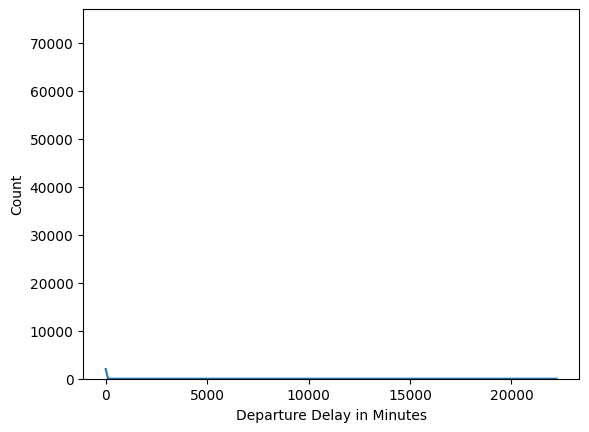

In [7]:
sns.histplot(df["Departure Delay in Minutes"], kde = True)

<Axes: xlabel='Arrival Delay in Minutes', ylabel='Count'>

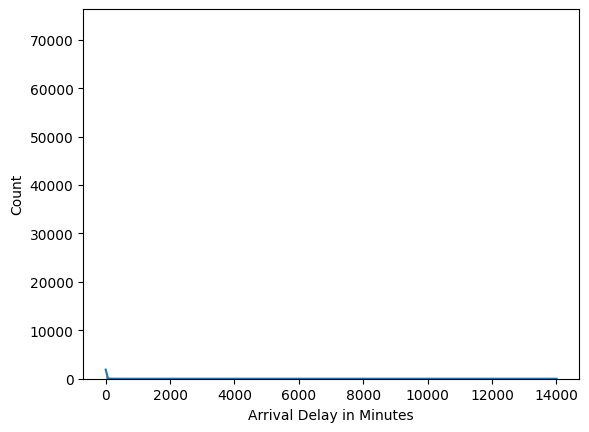

In [8]:
sns.histplot(df["Arrival Delay in Minutes"], kde = True)

<Axes: ylabel='Count'>

/home/vlad/.pyenv/versions/3.12.0/envs/images/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/vlad/.pyenv/versions/3.12.0/envs/images/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


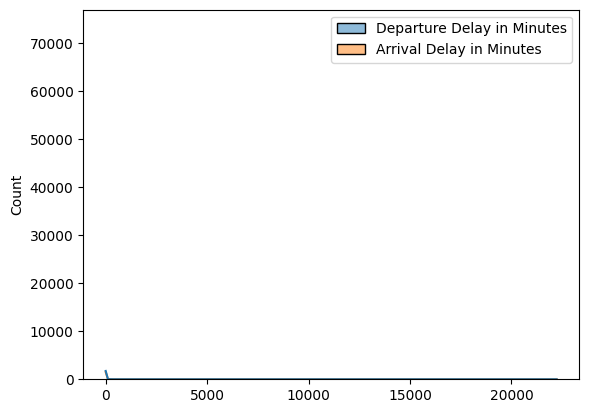

In [9]:
sns.histplot(df[["Departure Delay in Minutes", "Arrival Delay in Minutes"]], kde = True)

На первой диаграмме есть выбросы в виде сверхдальних рейсов.
На второй диаграмме есть выбросы в виде многосуточных задержек.
Удалим их.

In [10]:
df["Departure Delay in Minutes"] = np.where(df["Departure Delay in Minutes"] > 90, 90, df["Departure Delay in Minutes"])
df["Arrival Delay in Minutes"] = np.where(df["Arrival Delay in Minutes"] > 90, 90, df["Arrival Delay in Minutes"])

<Axes: xlabel='Departure Delay in Minutes', ylabel='Count'>

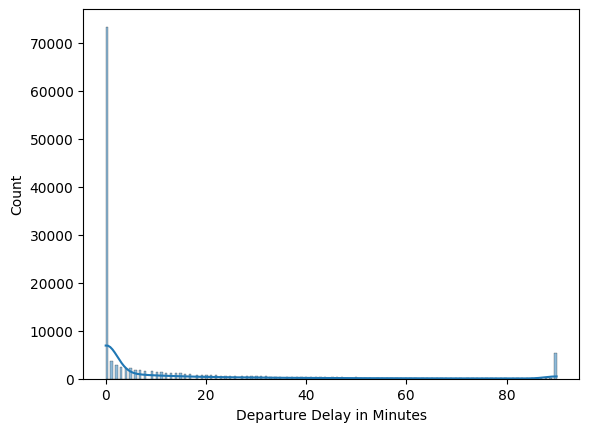

In [11]:
sns.histplot(df["Departure Delay in Minutes"], kde = True)

<Axes: xlabel='Arrival Delay in Minutes', ylabel='Count'>

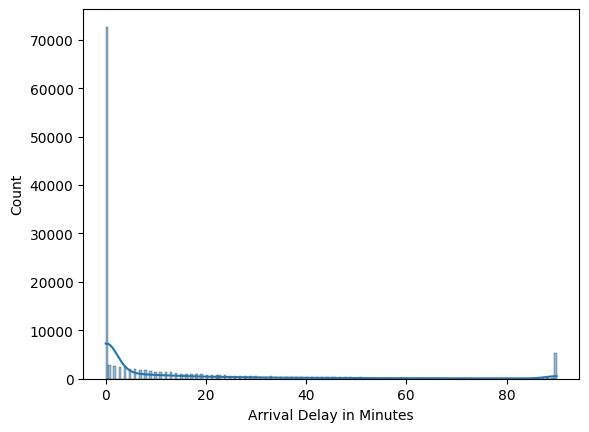

In [12]:
sns.histplot(df["Arrival Delay in Minutes"], kde = True)

<Axes: ylabel='Count'>

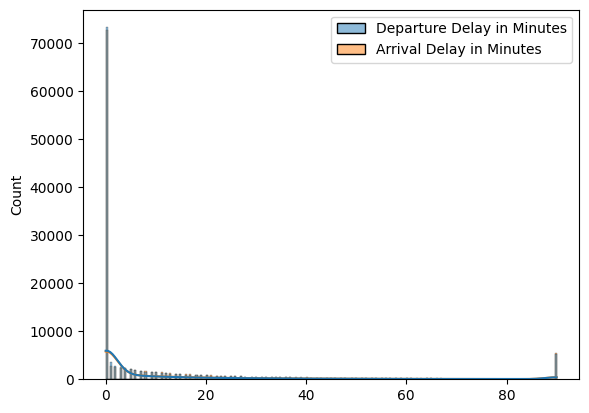

In [13]:
sns.histplot(df[["Departure Delay in Minutes", "Arrival Delay in Minutes"]], kde = True)

## Класс обслуживания

Определим связь класса обслуживания и задержки отправления рейса

In [14]:
df["Class"].value_counts(dropna = False)

Class
Business    62103
Eco         58264
Eco Plus     9397
NaN           116
Name: count, dtype: int64

In [15]:
df["Class"].fillna("Other", inplace = True)

/tmp/ipykernel_8914/2139654886.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Class"].fillna("Other", inplace = True)


In [16]:
df["Class"].value_counts(dropna = False)

Class
Business    62103
Eco         58264
Eco Plus     9397
Other         116
Name: count, dtype: int64

Построим гистограмму классов обсуживания

/tmp/ipykernel_8914/2248659856.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "Class", data = df, palette = "husl")


<Axes: xlabel='Class', ylabel='count'>

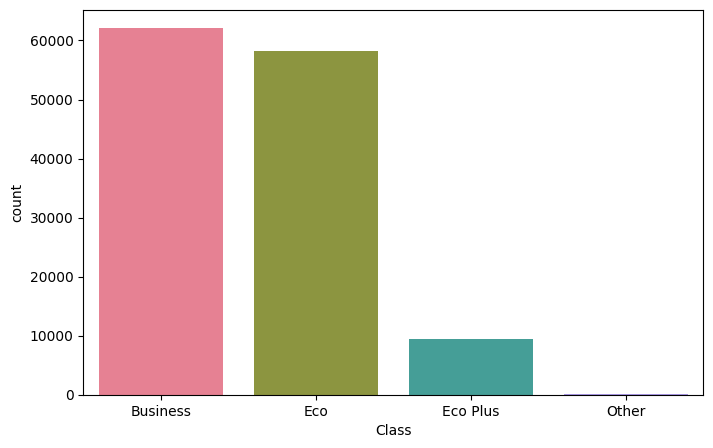

In [17]:
plt.figure(figsize = (8, 5))
sns.countplot(x = "Class", data = df, palette = "husl")

Визуализируем связь класса обслуживания и задержки отправления.

/tmp/ipykernel_8914/2797658376.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "Class", y = "Departure Delay in Minutes", data = df, palette = "husl")


<Axes: xlabel='Class', ylabel='Departure Delay in Minutes'>

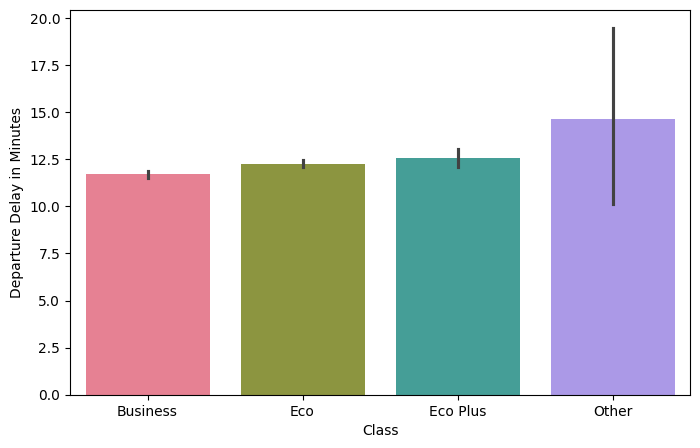

In [18]:
plt.figure(figsize = (8, 5))
sns.barplot(x = "Class", y = "Departure Delay in Minutes", data = df, palette = "husl")

In [19]:
print("Средняя задержка отправления для пассажиров бизнес-класса:", df[df.Class == "Business"]["Departure Delay in Minutes"].mean())
print("Средняя задержка отправления для пассажиров эконом-класса:", df[df.Class == "Eco"]["Departure Delay in Minutes"].mean())
print("Средняя задержка отправления для пассажиров комфорт-класса:", df[df.Class == "Eco Plus"]["Departure Delay in Minutes"].mean())

Средняя задержка отправления для пассажиров бизнес-класса: 11.703326456936566
Средняя задержка отправления для пассажиров эконом-класса: 12.249385939298167
Средняя задержка отправления для пассажиров комфорт-класса: 12.546858359957401


## Тип поездки

Определим связь типа поездки и задержки отправления рейса

In [20]:
df["Type of Travel"].value_counts(dropna = False)

Type of Travel
Business travel    89625
Personal Travel    40154
NaN                  101
Name: count, dtype: int64

In [21]:
df["Type of Travel"].fillna("Unknown", inplace = True)

/tmp/ipykernel_8914/919652659.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Type of Travel"].fillna("Unknown", inplace = True)


In [22]:
df["Type of Travel"].value_counts(dropna = False)

Type of Travel
Business travel    89625
Personal Travel    40154
Unknown              101
Name: count, dtype: int64

Построим гистограмму типов поездок

/tmp/ipykernel_8914/2579035426.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "Type of Travel", data = df, palette = "hls")


<Axes: xlabel='Type of Travel', ylabel='count'>

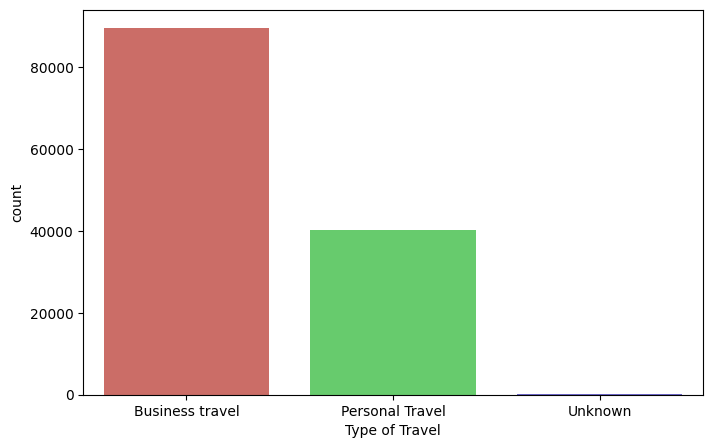

In [23]:
plt.figure(figsize = (8, 5))
sns.countplot(x = "Type of Travel", data = df, palette = "hls")

Визуализируем связь типа поездки и задержки отправления.

/tmp/ipykernel_8914/910012441.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "Type of Travel", y = "Departure Delay in Minutes", data = df, palette = "hls")


<Axes: xlabel='Type of Travel', ylabel='Departure Delay in Minutes'>

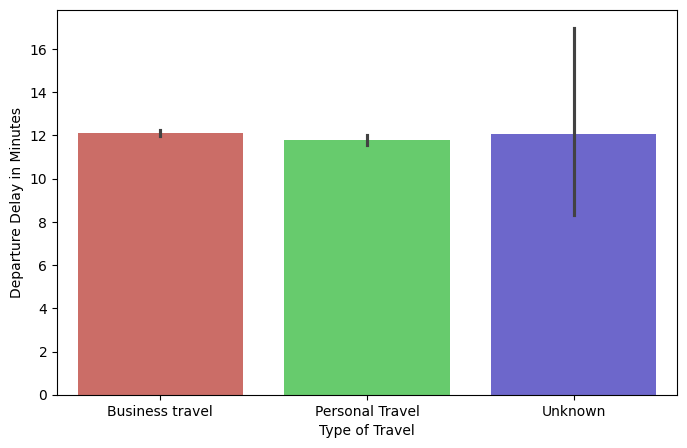

In [24]:
plt.figure(figsize = (8, 5))
sns.barplot(x = "Type of Travel", y = "Departure Delay in Minutes", data = df, palette = "hls")

In [25]:
print("Средняя задержка отправления для деловых поездок", df[df["Type of Travel"] == "Business travel"]["Departure Delay in Minutes"].mean())
print("Средняя задержка отправления для личных поездок", df[df["Type of Travel"] == "Personal Travel"]["Departure Delay in Minutes"].mean())

Средняя задержка отправления для деловых поездок 12.11534509716328
Средняя задержка отправления для личных поездок 11.781072460879098


Посмотрим, как влияют оба фактора на зедержку отправления

<Axes: xlabel='Class', ylabel='Departure Delay in Minutes'>

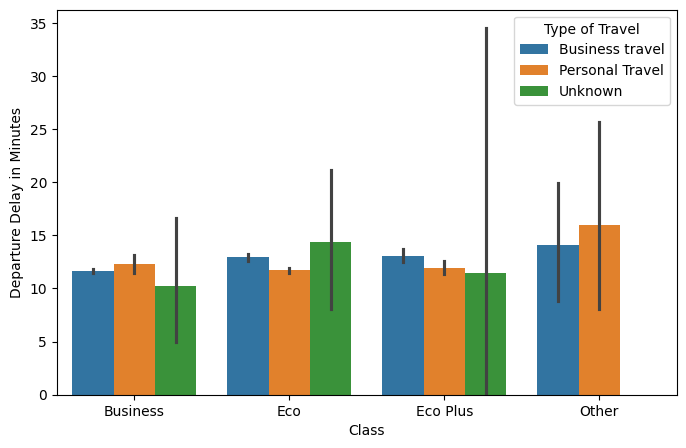

In [26]:
plt.figure(figsize = (8, 5))
sns.barplot(x = "Class", y = "Departure Delay in Minutes", hue = "Type of Travel", data = df, palette = "tab10")

## Бинаризация задержек

Если задержка превышает 15 минут, выплачиваем компенсацию 100$.
Создаём столбец Compensation

In [27]:
df["Compensation"] = df["Departure Delay in Minutes"].apply(lambda t: 100 if t > 15 else 0)

In [28]:
df[["Departure Delay in Minutes" , "Arrival Delay in Minutes", "Compensation"]].sample(5)

,Departure Delay in Minutes,Arrival Delay in Minutes,Compensation
43779,0.0,0.0,0
45739,0.0,0.0,0
30814,4.0,0.0,0
68863,0.0,0.0,0
122105,0.0,0.0,0


In [29]:
a = df["Compensation"].value_counts()
float(round(a[100] / len(df["Compensation"]), 4))

0.2215

## Возраст

Определим связь возраста пассажира и задержки отправления рейса

In [30]:
df["Age"].value_counts(dropna = False)

Age
39.0     3666
25.0     3480
40.0     3189
44.0     3070
41.0     3069
         ... 
244.0       1
118.0       1
528.0       1
93.0        1
171.0       1
Name: count, Length: 264, dtype: int64

Построим гистограмму возраста пассажира

<Axes: xlabel='Age', ylabel='Count'>

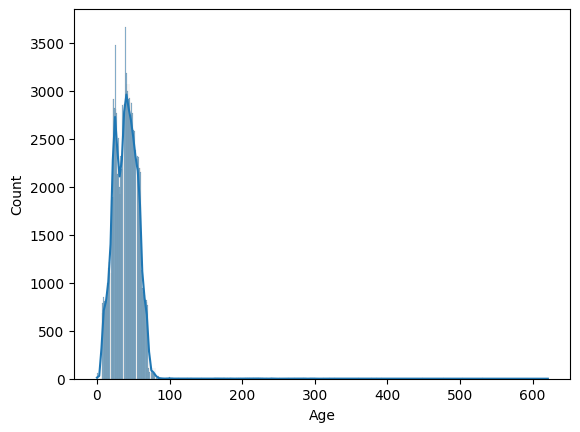

In [31]:
sns.histplot(df["Age"], kde = True)

Визуализируем связь возраста пассажира и задержки отправления.

<Axes: ylabel='Count'>

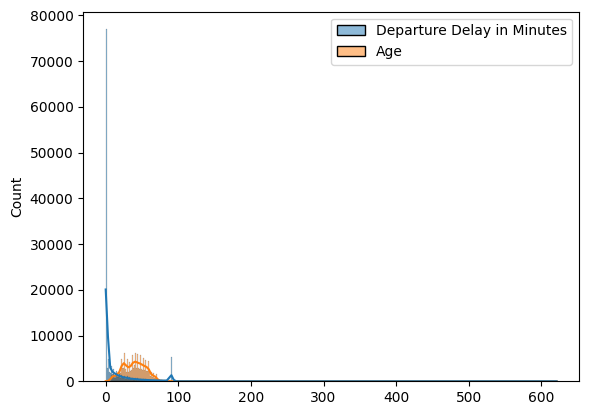

In [32]:
sns.histplot(df[["Departure Delay in Minutes", "Age"]], kde = True)

## Пол

Определим связь пола пассажира и задержки отправления рейса

In [33]:
df["Gender"].value_counts(dropna = False)

Gender
Female    65726
Male      63823
NaN         331
Name: count, dtype: int64

In [34]:
df["Gender"].fillna("Non-binary", inplace = True)

/tmp/ipykernel_8914/3227234586.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Gender"].fillna("Non-binary", inplace = True)


In [35]:
df["Gender"].value_counts(dropna = False)

Gender
Female        65726
Male          63823
Non-binary      331
Name: count, dtype: int64

Построим гистограмму пола пассажира

/tmp/ipykernel_8914/1069852795.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "Gender", data = df, palette = "mako")


<Axes: xlabel='Gender', ylabel='count'>

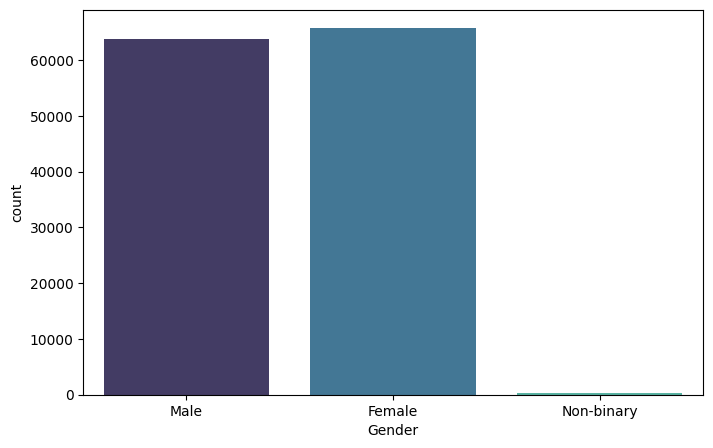

In [36]:
plt.figure(figsize = (8, 5))
sns.countplot(x = "Gender", data = df, palette = "mako")

Визуализируем связь пола пассажира и задержки отправления.

/tmp/ipykernel_8914/2652945805.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "Gender", y = "Departure Delay in Minutes", data = df, palette = "mako")


<Axes: xlabel='Gender', ylabel='Departure Delay in Minutes'>

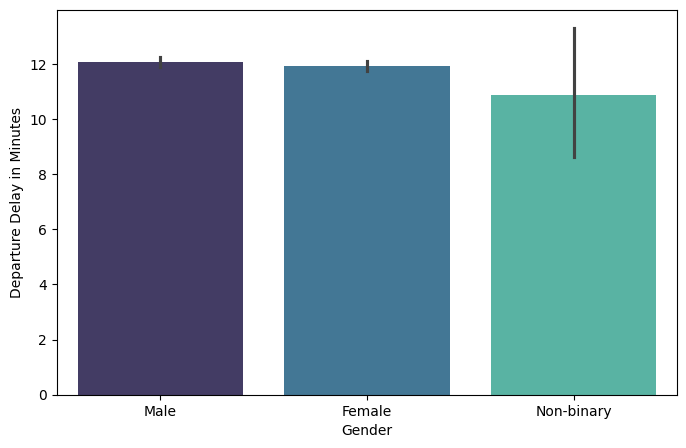

In [37]:
plt.figure(figsize = (8, 5))
sns.barplot(x = "Gender", y = "Departure Delay in Minutes", data = df, palette = "mako")

In [38]:
print("Средняя задержка отправления для мужчин:", df[df.Gender == "Male"]["Departure Delay in Minutes"].mean())
print("Средняя задержка отправления для женщин:", df[df.Gender == "Female"]["Departure Delay in Minutes"].mean())
print("Средняя задержка отправления для лиц неопределённого пола:", df[df.Gender == "Non-binary"]["Departure Delay in Minutes"].mean())

Средняя задержка отправления для мужчин: 12.08978842866329
Средняя задержка отправления для женщин: 11.94215983313287
Средняя задержка отправления для лиц неопределённого пола: 10.867069486404834


# Машинное обучение

Определим степень удовлетворённости клиента в завимости от оценок:
- `Inflight wifi service` (categorical, int): оценка клиентом интернета на борту
- `Departure/Arrival time convenient` (categorical, int): оценка клиентом удобство времени прилета и вылета
- `Ease of Online booking` (categorical, int): оценка клиентом удобства онлайн-бронирования
- `Gate location` (categorical, int): оценка клиентом расположения выхода на посадку в аэропорту
- `Food and drink` (categorical, int): оценка клиентом еды и напитков на борту
- `Online boarding` (categorical, int): оценка клиентом выбора места в самолете
- `Seat comfort` (categorical, int): оценка клиентом удобства сиденья
- `Inflight entertainment` (categorical, int): оценка клиентом развлечений на борту
- `On-board service` (categorical, int): оценка клиентом обслуживания на борту
- `Leg room service` (categorical, int): оценка клиентом места в ногах на борту
- `Baggage handling` (categorical, int): оценка клиентом обращения с багажом
- `Checkin service` (categorical, int): оценка клиентом регистрации на рейс
- `Inflight service` (categorical, int): оценка клиентом обслуживания на борту
- `Cleanliness` (categorical, int): оценка клиентом чистоты на борту

In [43]:
grades = [
    "Inflight wifi service",
    "Departure/Arrival time convenient",
    "Ease of Online booking",
    "Gate location",
    "Food and drink",
    "Online boarding",
    "Seat comfort",
    "Inflight entertainment",
    "On-board service",
    "Leg room service",
    "Baggage handling",
    "Checkin service",
    "Inflight service",
    "Cleanliness"
]

X = df[grades]
X.fillna(X.median(), inplace = True)
y = df["satisfaction"]

/tmp/ipykernel_8914/3404670378.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.median(), inplace = True)


In [44]:
X.head()

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,3.0,3.0,3.0,3.0,5.0,3.0,5.0,5.0,3.0,2.0,5.0,4.0,5.0,5.0
1,2.0,2.0,2.0,2.0,3.0,5.0,4.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0
2,4.0,4.0,4.0,4.0,5.0,5.0,5.0,3.0,3.0,3.0,3.0,4.0,3.0,5.0
3,2.0,2.0,2.0,2.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0,4.0
4,3.0,3.0,3.0,3.0,4.0,5.0,4.0,3.0,3.0,4.0,3.0,3.0,3.0,5.0


In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)
X_train.shape, y_train.shape

((77928, 14), (77928,))

In [46]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

/home/vlad/.pyenv/versions/3.12.0/envs/images/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [49]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred, y_test)

array([[    0,     0,     1],
       [ 6050, 20150,  4219],
       [ 4293,  3334, 13905]])